In [2]:
from Ngram import Ngram
import numpy as np 
import random
import math
from matplotlib import pyplot as pyplot
models = {}
for i in range(1,4):
        models[str(i)+'gram'] = Ngram(i)

In [3]:
def prob(model,cont,wrd):
        try:
            denom = float(model.occs_count[cont])
            temp = list(cont)
            temp.append(wrd)
            num = model.context_count[tuple(temp)]
            return num/denom
        except:
            return 0
def generate_interpolation(models,text_len,type = "None",l1=1/5,l2=3/6,l3=2/6):
        conts = [[],['<s>'],['<s>','<s>']]
        res = [];i = 0;perp=0
        while i<text_len:
            wrd_probs = {}
            cons = [tuple(i) for i in conts]
            for wrd in models['3gram'].occurences[cons[2]]:
                    p1 = prob(models['1gram'],cons[0],wrd);p2 = prob(models['2gram'],cons[1],wrd);p3 = prob(models['3gram'],cons[2],wrd)
                    wrd_probs[wrd] = p1*l1+p2*l2+p3*l3
            wrd = np.random.choice(list(wrd_probs.keys()),1,list(wrd_probs.values()))[0]
            perp+=math.log(wrd_probs[wrd])
            if wrd == '</s>':
                    conts = [[],['<s>'],['<s>','<s>']]
                    res.append('.')
            else:
                    conts[1].pop(0); conts[1].append(wrd);conts[2].pop(0); conts[2].append(wrd);
                    res.append(wrd)
                    i+=1
        return ' '.join(res),math.exp(abs(perp)/len(res))

In [17]:
def perplexity(sent):
        if type(sent)==str:
            sent = sent.split()
        l1,l2,l3 = 0.3739111601036935, 0.48554817962017016, 0.1405406602761363
        conts = [[],['<s>'],['<s>','<s>']]
        perp=0
        probs = 0
        for wrd in sent:
            cons = [tuple(i) for i in conts]
            for wrd in models['3gram'].occurences[cons[2]]:
                    p1 = prob(models['1gram'],cons[0],wrd);p2 = prob(models['2gram'],cons[1],wrd);p3 = prob(models['3gram'],cons[2],wrd)
                    probs+=p1*l1+p2*l2+p3*l3

            perp+=math.log(probs)
            if wrd == '</s>' or wrd == '.':
                    conts = [[],['<s>'],['<s>','<s>']]
            else:
                    conts[1].pop(0); conts[1].append(wrd);conts[2].pop(0); conts[2].append(wrd);
        return math.exp(abs(perp)/len(sent))
def test():
    rand = np.random.randint(0,len(models['1gram'].test),10)
    for i in rand:
        print(' '.join(models['1gram'].test[i]))
        print(perplexity(models['1gram'].test[i]))
test()

narcissa knew that the only way she would be permitted to enter hogwarts and find her son was as part of the conquering army </s>
3.7835156966601082
the goblin stroked the sword and his black eyes roved from harry to hermione to ron and then back again </s>
3.282952854525441
they like punishment the carrows </s>
1.3514947022370458
harry dropped his eyes to the caption </s>
1.592619747881574
</s>
1.0933034262661634
they seemed as scared as harry whose heart was now throwing itself against his ribs as though determined to escape the body he was about to cast aside </s>
4.293161039181335
’ knew yeh mus’ be here knew what mus’ be happenin’ </s>
2.1344407459046786
but why he knows i’m after horcruxes — he’s keeping nagini close beside him — obviously i’m going to have to go to him to get near the thing — right said ron squaring his shoulders </s>
5.282001134091189
deeper and deeper into the forest she led him and harry walked quickly sure that when she stopped she would allow him to approac

Calculating the  weights for interpolation using gradient descent

In [36]:
sentences = models['1gram'].dev
a1 = []
cont3 = ['<s>','<s>'];cont1 = [];cont2 = ['<s>']
z2 = 0;z3 = 0
print(len(sentences))
for i in range(len(sentences)):
        for wrd in sentences[i]:
                p1 = prob(models['1gram'],tuple(cont1),wrd);p2 = prob(models['2gram'],tuple(cont2),wrd);p3 = prob(models['3gram'],tuple(cont3),wrd)
                cont2 = [wrd];cont3=[cont3[1],wrd]
                if p1==0:
                        continue
                if p2 == 0: z2+=1
                if p3 == 0: z3+=1
                a1.append([p1,p2,p3])
prob_arr = a1
w1 = 1/3;w2 = 1/3;w3 = 1/3
a1l = [];a2l=[];a3l=[]

6485


In [48]:
iters = 400
lr = 0.01
for i in range(iters):
    sum2 = 0;sum3 = 0
    for probs in prob_arr:
            denom = (w1*probs[0]+w2*probs[1]+w3*probs[2])
            sum2+= (probs[1]-probs[0])/denom
            sum3+= (probs[2]-probs[0])/denom
    sum2/=len(prob_arr);sum3/=len(prob_arr)
    w2+=lr*sum2;w3+=lr*sum3
    a1 = 1-w2-w3
    a1l.append(w1);a2l.append(w2);a3l.append(w3)

In [5]:
w1,w2,w3=(0.3739111601036935, 0.48554817962017016, 0.1405406602761363)

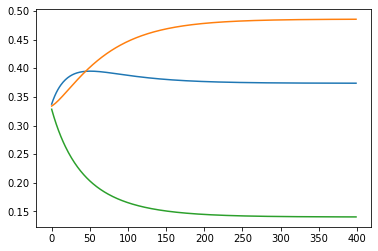

In [50]:
pyplot.plot(a1l)
pyplot.plot(a2l)
pyplot.plot(a3l)

for unigram, bigram and trigram
the values have converged

w1 = 0.3739111601036935

w2 =  0.48554817962017016

w3 =  0.1405406602761363

In [52]:
p=0
for i in range(300):
    text,perp = (generate_interpolation(models,text_len=30,type = "None",l1=w1,l2=w2,l3=w3))
    p+=perp
print('The average perplexity for on training the weights over dev set = ', p/300)

The average perplexity for on training the weights over dev set =  37.83539239961653


In [12]:
text,perp = generate_interpolation(models,text_len=30,type = "None",l1=w1,l2=w2,l3=w3)
print(f"Generated Text:\n{text}\nPerplexity = {perp}")

Generated Text:
court scribe percy ignatius weasley — hog warts ’ said weasley . gotchcd get off — be that long dirty blonde hair fell into bed rolled over . breathing very slowly dragging
Perplexity = 31.409189597631137


#Training using train data

In [61]:
sentences = models['1gram'].train
prob_arr = []
cont3 = ['<s>','<s>'];cont1 = [];cont2 = ['<s>']
z2 = 0;z3 = 0
print(len(sentences))
for i in range(len(sentences)):
        for wrd in sentences[i]:
                p1 = prob(models['1gram'],tuple(cont1),wrd);p2 = prob(models['2gram'],tuple(cont2),wrd);p3 = prob(models['3gram'],tuple(cont3),wrd)
                cont2 = [wrd];cont3=[cont3[1],wrd]
                if p1==0:
                        continue
                if p2 == 0: z2+=1
                if p3 == 0: z3+=1
                prob_arr.append([p1,p2,p3])
w1 = 1/3;w2 = 1/3;w3 = 1/3
a1l = [];a2l=[];a3l=[]

51876


0.07418814365867388 0.09189877146456114 0.833913084876765


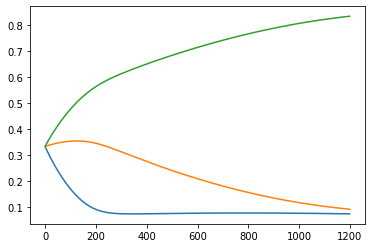

In [66]:
iters = 1200
lr = 0.001
for i in range(iters):
    sum2 = 0;sum3 = 0
    for probs in prob_arr:
            denom = (w1*probs[0]+w2*probs[1]+w3*probs[2])
            sum2+= (probs[1]-probs[0])/denom
            sum3+= (probs[2]-probs[0])/denom
    sum2/=len(prob_arr);sum3/=len(prob_arr)
    w2+=lr*sum2;w3+=lr*sum3
    w1 = 1-w2-w3
    a1l.append(w1);a2l.append(w2);a3l.append(w3)
print(w1,w2,w3)
pyplot.plot(a1l)
pyplot.plot(a2l)
pyplot.plot(a3l)

There doesn't appear to be a clear convergence in values for 1200 iterations

But the it seems that the values will go towards 1 for w3 and towards 0 for other 2

This is because p3 would give higher probability when training over train set